In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data from CSV files into pandas
dim_date=pd.read_csv("dim_date.csv")
dim_hotels=pd.read_csv("dim_hotels.csv")
dim_rooms=pd.read_csv("dim_rooms.csv")
fact_agg_bookings=pd.read_csv("fact_aggregated_bookings.csv")
fact_bookings=pd.read_csv("fact_bookings.csv")

## Exploratory Data Analysis (EDA)

## Dataset - dim_date

In [3]:
dim_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [4]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


### Observations 
1. The dataset consists of 92 entries across 4 columns.
2. Columns include 'date', 'mmm yy', 'week no', and 'day_type'.
3. All columns contain non-null values, indicating a complete dataset.
4. Data types for all columns are 'object', suggesting the need for potential data type conversion for date-related columns.
5. Memory usage for the DataFrame is relatively low, approximately 3.0 KB, indicating efficient memory utilization.

## Dataet -dim_hotels

In [5]:
dim_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [6]:
dim_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


### Observations 
1. The dataset contains 4 entries across 2 columns.
2. Columns include 'room_id' and 'room_class'.
3. Both columns have non-null values, indicating a complete dataset.
4. Data types for both columns are 'object', which may necessitate data type conversion for numerical analysis.
5. The memory usage for this DataFrame is minimal, approximately 196.0 bytes, indicating efficient memory utilization.



In [7]:
dim_hotels.groupby(["city","property_name"])["property_id"].unique()

city       property_name
Bangalore  Atliq Bay               [19562]
           Atliq Blu               [19561]
           Atliq City              [19560]
           Atliq Exotica           [19559]
           Atliq Grands            [19558]
           Atliq Palace            [19563]
Delhi      Atliq Bay               [16562]
           Atliq Blu               [16561]
           Atliq City              [16560]
           Atliq Grands            [16558]
           Atliq Palace            [16563]
Hyderabad  Atliq Bay               [18562]
           Atliq Blu               [18561]
           Atliq City              [18560]
           Atliq Exotica           [18559]
           Atliq Grands            [18558]
           Atliq Palace            [18563]
Mumbai     Atliq Bay               [17562]
           Atliq Blu               [17561]
           Atliq City              [17560]
           Atliq Exotica    [16559, 17559]
           Atliq Grands            [17558]
           Atliq Palace      

## Observations 
- In Mumbai Property Atliq Exotica two Property IDs Present 16559 and 17559
- 16 is starting in delhis Property ID and 17 is start in Mumbais Property ID
- we change the city in front of 16559

In [8]:
dim_hotels[dim_hotels["property_id"]==16559]

,property_id,property_name,category,city
1,16559,Atliq Exotica,Luxury,Mumbai


In [9]:
dim_hotels.iloc[1,-1]="Delhi"

In [10]:
dim_hotels[dim_hotels["property_id"]==16559]

,property_id,property_name,category,city
1,16559,Atliq Exotica,Luxury,Delhi


## Dataset - dim_rooms

In [11]:
dim_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [12]:
dim_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


### Observations 


1. The dataset consists of only 4 entries spread across 2 columns.
2. Columns are labeled as 'room_id' and 'room_class'.
3. Both columns have non-null values, indicating a complete dataset.
4. Data types for both columns are 'object', which suggests categorical or textual data.
5. Memory usage for this DataFrame is very minimal, approximately 196.0 bytes, indicating highly efficient memory utilization.


## Dataset - fact_aggregated_bookings

In [13]:
fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [14]:
fact_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


### observations 


1. The dataset comprises 9200 entries distributed over 5 columns.
2. Columns include 'property_id', 'check_in_date', 'room_category', 'successful_bookings', and 'capacity'.
3. All columns contain non-null values, indicating a complete dataset.
4. Data types include 'int64' for numerical columns ('property_id', 'successful_bookings', and 'capacity') and 'object' for categorical columns ('check_in_date' and 'room_category').
5. Memory usage for the DataFrame is relatively moderate, approximately 359.5 KB, suggesting a reasonable memory footprint for analysis and manipulation.

In [15]:
fact_agg_bookings.describe(include="all")

,property_id,check_in_date,room_category,successful_bookings,capacity
count,9200.000000,9200,9200,9200.000000,9200.000000
unique,NaN,92,4,NaN,NaN
top,NaN,01-May-22,RT1,NaN,NaN
freq,NaN,100,2300,NaN,NaN
mean,18040.640000,NaN,NaN,14.629348,25.280000
std,1099.818325,NaN,NaN,7.591770,11.440971
min,16558.000000,NaN,NaN,1.000000,3.000000
25%,17558.000000,NaN,NaN,9.000000,18.000000
50%,17564.000000,NaN,NaN,14.000000,25.000000
75%,18563.000000,NaN,NaN,19.000000,34.000000


### Insights 

- There are 92 unique check-in dates and 4 unique room categories.
- The most frequent room category booked is 'RT1', occurring 2,300 times.
- Property IDs range from 16,558 to 19,563, with a mean of approximately 18,041 and a standard deviation of approximately 1,100.
- The average successful bookings per property is approximately 14.63, with a minimum of 1 booking and a maximum of 43 bookings.
- Property capacities range from 3 to 50 guests, with a mean capacity of approximately 25.28 and a standard deviation of approximately 11.44.

## Dataset - fact_bookings 

In [16]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [17]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


### Observations 

1. The dataset comprises 134,590 entries and 12 columns.
2. Columns include 'booking_id', 'property_id', 'booking_date', 'check_in_date', 'checkout_date', 'no_guests', 'room_category', 'booking_platform', 'ratings_given', 'booking_status', 'revenue_generated', and 'revenue_realized'.
3. All columns except 'ratings_given' contain non-null values, indicating mostly complete data.
4. Data types vary, with 'object' for textual data ('booking_id', 'booking_date', 'check_in_date', 'checkout_date', 'room_category', 'booking_platform', 'booking_status'), 'int64' for integer data ('property_id', 'no_guests', 'revenue_generated', 'revenue_realized'), and 'float64' for floating-point data ('ratings_given').
5. The 'ratings_given' column has missing values, suggesting potential areas for data imputation or analysis with caution.
6. Memory usage for this DataFrame is relatively high, approximately 12.3 MB, indicating significant memory requirements for storage and processing.

In [18]:
fact_bookings.describe(include='all')

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
count,134590,134590.000000,134590,134590,134590,134590.000000,134590,134590,56683.000000,134590,134590.000000,134590.000000
unique,134590,NaN,116,92,97,NaN,4,7,NaN,3,NaN,NaN
top,May012216558RT11,NaN,2022-06-08,2022-07-16,2022-05-09,NaN,RT2,others,NaN,Checked Out,NaN,NaN
freq,1,NaN,1670,2017,1840,NaN,49505,55066,NaN,94411,NaN,NaN
mean,NaN,18061.113493,NaN,NaN,NaN,2.036808,NaN,NaN,3.619004,NaN,14916.013188,12696.123256
std,NaN,1093.055847,NaN,NaN,NaN,1.031766,NaN,NaN,1.235009,NaN,6452.868072,6928.108124
min,NaN,16558.000000,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,6500.000000,2600.000000
25%,NaN,17558.000000,NaN,NaN,NaN,1.000000,NaN,NaN,3.000000,NaN,9900.000000,7600.000000
50%,NaN,17564.000000,NaN,NaN,NaN,2.000000,NaN,NaN,4.000000,NaN,13500.000000,11700.000000
75%,NaN,18563.000000,NaN,NaN,NaN,2.000000,NaN,NaN,5.000000,NaN,18000.000000,15300.000000


### Insights 

- There are 116 unique booking dates, 92 unique check-in dates, and 97 unique checkout dates.
- The most common room category booked is 'RT2', with 'others' being the most common booking platform.
- Ratings have been given for 56,683 bookings out of 134,590, with an average rating of approximately 3.62.
- The average number of guests per booking is approximately 2.04, with a maximum of 6 guests.
- Revenue generated ranges from $6,500 to $45,220, with an average revenue of approximately $14,916.
- The revenue realized varies from $2,600 to $45,220, with an average realization of approximately $12,696.
- There are three unique booking statuses: 'Checked Out', 'NaN' (implying missing values), and potentially other statuses not specified in this summary.
- The property IDs range from 16,558 to 19,563, with a mean of approximately 18,061 and a standard deviation of approximately 1,093.

In [19]:
# first change the date columns to the datetime 
def convert_to_datetime(df):
    date_columns = ['date', 'booking_date', 'check_in_date', 'checkout_date']
    
    for column in date_columns:
        if column in df.columns:
            df[column] = pd.to_datetime(df[column])
    
    return df



In [20]:
convert_to_datetime(dim_date)
convert_to_datetime(dim_hotels)
convert_to_datetime(dim_rooms)
convert_to_datetime(fact_agg_bookings)
convert_to_datetime(fact_bookings)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13640\3540963717.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13640\3540963717.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column])


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [21]:
fact_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [22]:
# Fill the Missing values From the Fact_booking 
fact_bookings["ratings_given"]=fact_bookings["ratings_given"].fillna(0)

In [23]:
fact_bookings.isnull().sum()

booking_id           0
property_id          0
booking_date         0
check_in_date        0
checkout_date        0
no_guests            0
room_category        0
booking_platform     0
ratings_given        0
booking_status       0
revenue_generated    0
revenue_realized     0
dtype: int64

In [24]:
# Check the Duplicated values from the all datasets
datasets=[dim_date,dim_hotels,dim_rooms,fact_agg_bookings,fact_bookings]

def check_duplicates(df):
    # Using pandas duplicated() method to find duplicated rows
    duplicated_rows = df[df.duplicated()]
    
    if duplicated_rows.empty:
        print("No duplicated rows found.")
    else:
        print("Duplicated rows found:")
        print(duplicated_rows)

for i in datasets:
    check_duplicates(i)


No duplicated rows found.
No duplicated rows found.
No duplicated rows found.
No duplicated rows found.
No duplicated rows found.


In [25]:
for df in datasets:
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    # Loop through each categorical column and print unique values
    for column in categorical_columns:
        unique_values = df[column].unique()
        print(f"Unique values in '{column}':")
        print(unique_values)
        print()

Unique values in 'mmm yy':
['May 22' 'Jun 22' 'Jul 22']

Unique values in 'week no':
['W 19' 'W 20' 'W 21' 'W 22' 'W 23' 'W 24' 'W 25' 'W 26' 'W 27' 'W 28'
 'W 29' 'W 30' 'W 31' 'W 32']

Unique values in 'day_type':
['weekend' 'weekeday']

Unique values in 'property_name':
['Atliq Grands' 'Atliq Exotica' 'Atliq City' 'Atliq Blu' 'Atliq Bay'
 'Atliq Palace' 'Atliq Seasons']

Unique values in 'category':
['Luxury' 'Business']

Unique values in 'city':
['Delhi' 'Mumbai' 'Hyderabad' 'Bangalore']

Unique values in 'room_id':
['RT1' 'RT2' 'RT3' 'RT4']

Unique values in 'room_class':
['Standard' 'Elite' 'Premium' 'Presidential']

Unique values in 'room_category':
['RT1' 'RT2' 'RT3' 'RT4']

Unique values in 'booking_id':
['May012216558RT11' 'May012216558RT12' 'May012216558RT13' ...
 'Jul312217564RT48' 'Jul312217564RT49' 'Jul312217564RT410']

Unique values in 'room_category':
['RT1' 'RT2' 'RT3' 'RT4']

Unique values in 'booking_platform':
['direct online' 'others' 'logtrip' 'tripster' 'makeyour

In [26]:
def histogram(df):
    """
    Create histograms for each numerical column in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame for which histograms are to be created.

    Returns:
    None
    """

    # Filter numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Create histograms for each numerical column
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()


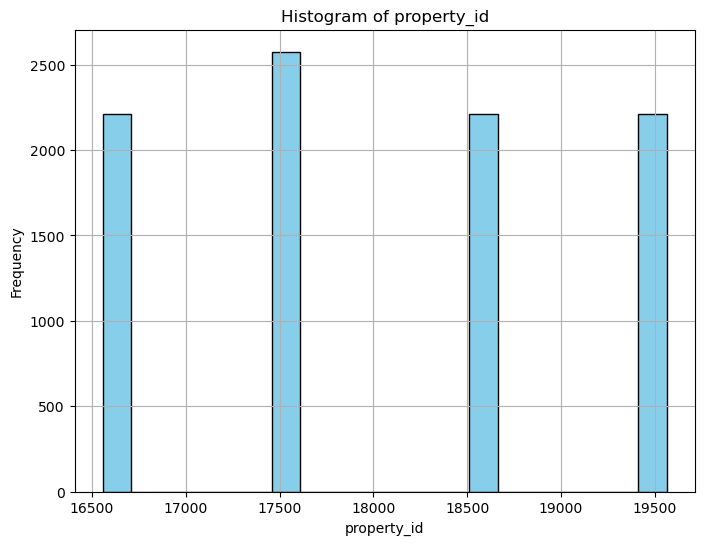

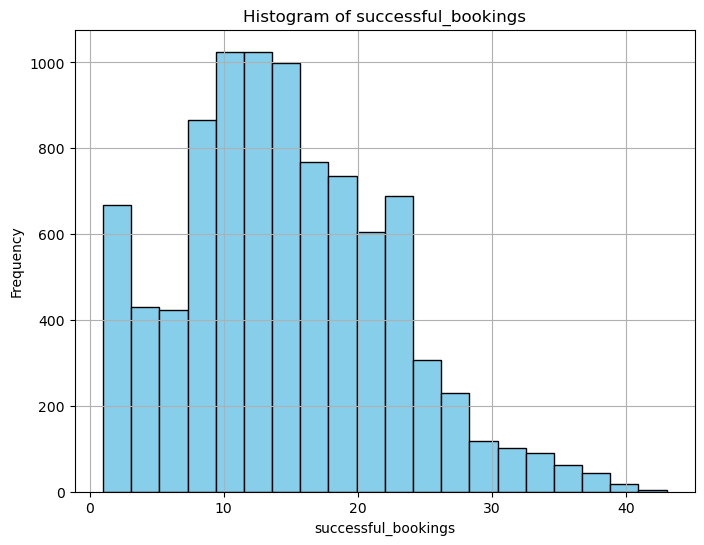

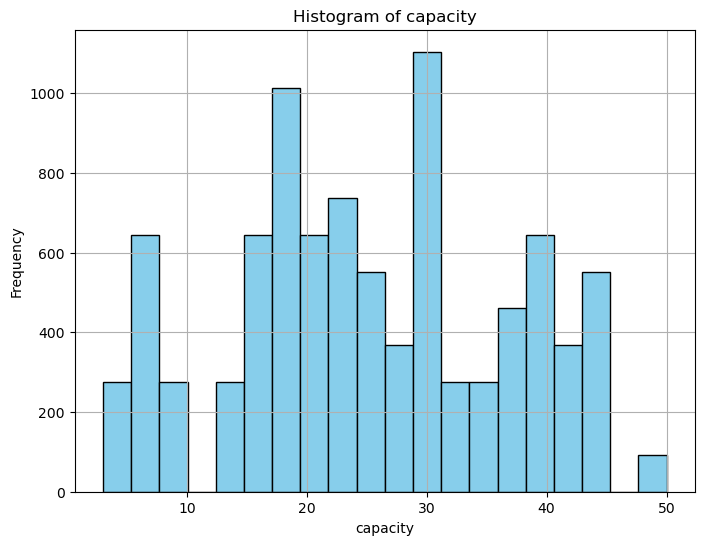

In [27]:
histogram(fact_agg_bookings)

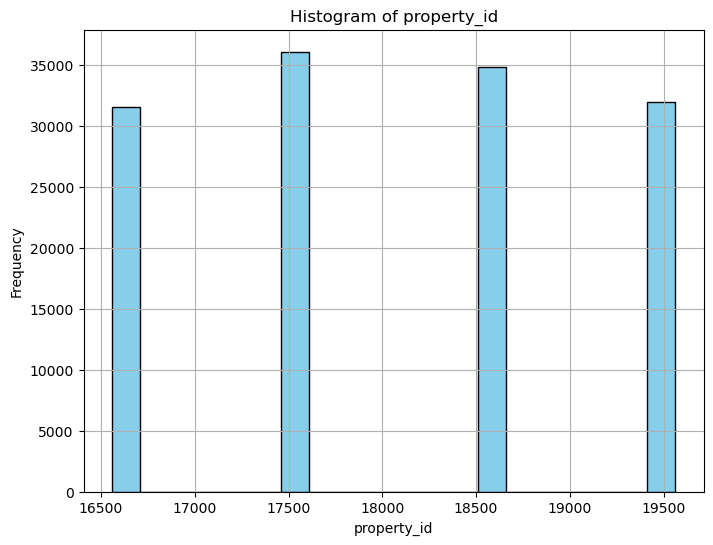

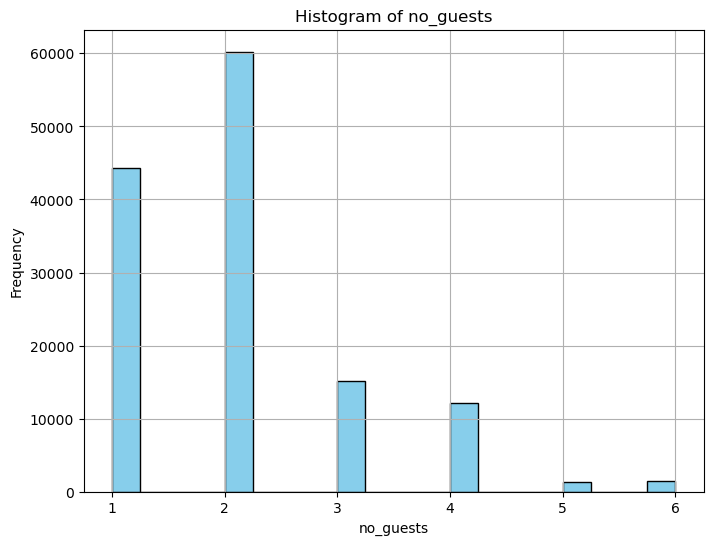

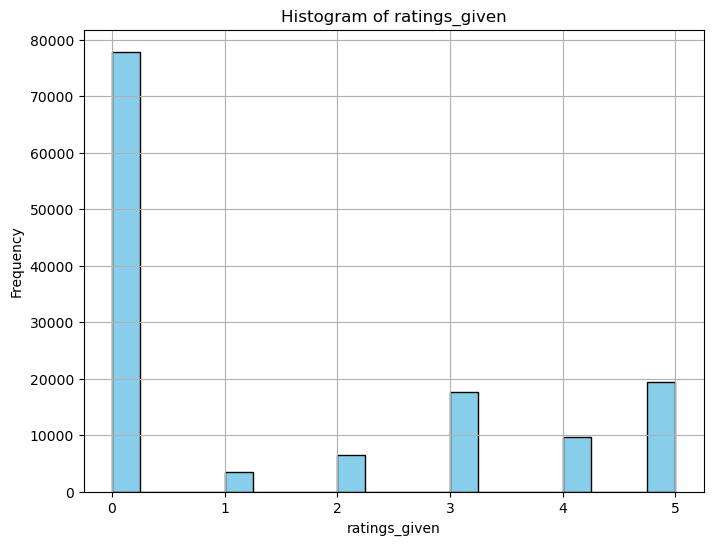

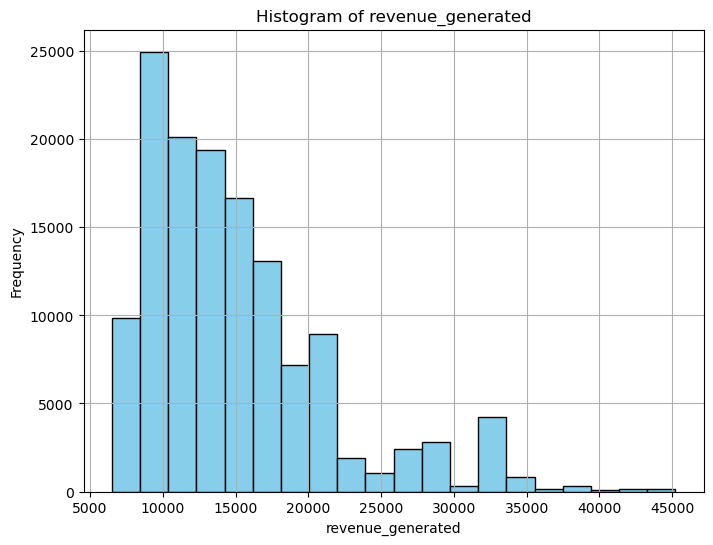

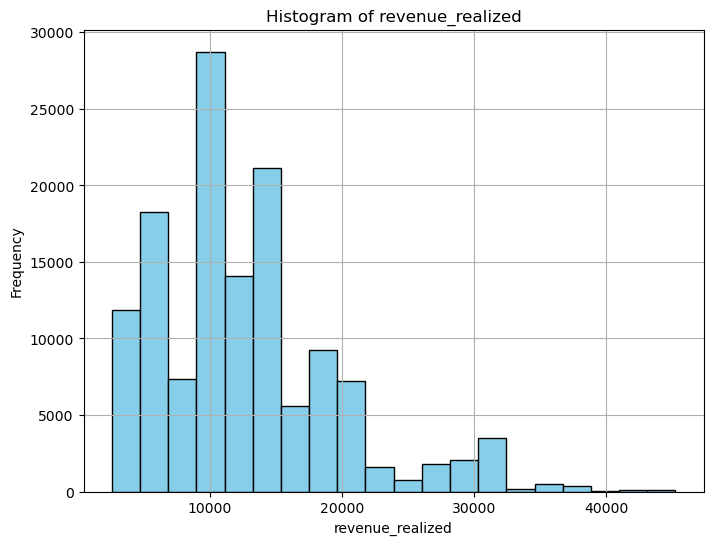

In [28]:
histogram(fact_bookings)

### Observations 
"Both 'revenue_realized' and 'revenue_generated' columns exhibit right-skewed distributions, indicating that the majority of the observations have lower revenue values, with a long tail towards higher revenue values."

#### Feature Engeeneering

In [29]:
# Calculate the length of stay (check-out date minus check-in date).
fact_bookings['length_of_stay'] = (fact_bookings['checkout_date'] - fact_bookings['check_in_date']).dt.days

In [30]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,length_of_stay
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,1
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640,1
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,3
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640,1
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,1


<Axes: xlabel='length_of_stay'>

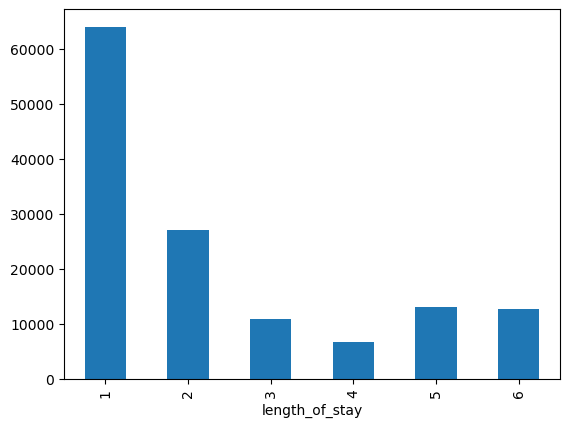

In [31]:
fact_bookings.groupby("length_of_stay")["booking_id"].count().plot(kind="bar")

In [32]:
fact_bookings.groupby("length_of_stay")["booking_id"].count()/len(fact_bookings["booking_id"])*100

length_of_stay
1    47.600862
2    20.167917
3     8.055576
4     4.990713
5     9.720633
6     9.464299
Name: booking_id, dtype: float64

### Observations 

1. The majority of bookings have a length of stay of 1 day, accounting for approximately 47.60% of all bookings.
2. Bookings with a length of stay of 2 days represent around 20.17% of all bookings.
3. Around 8.06% of bookings have a length of stay of 3 days.
4. Bookings with lengths of stay of 4 days, 5 days, and 6 days account for approximately 4.99%, 9.72%, and 9.46% of all bookings respectively.

In [33]:
# calculation of Revenue per Guest
fact_bookings['revenue_per_guest'] = (fact_bookings['revenue_generated'] / fact_bookings['no_guests']).round(2)
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,length_of_stay,revenue_per_guest
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,1,3336.67
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640,1,4550.00
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,3,4550.00
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640,1,4550.00
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,1,2730.00


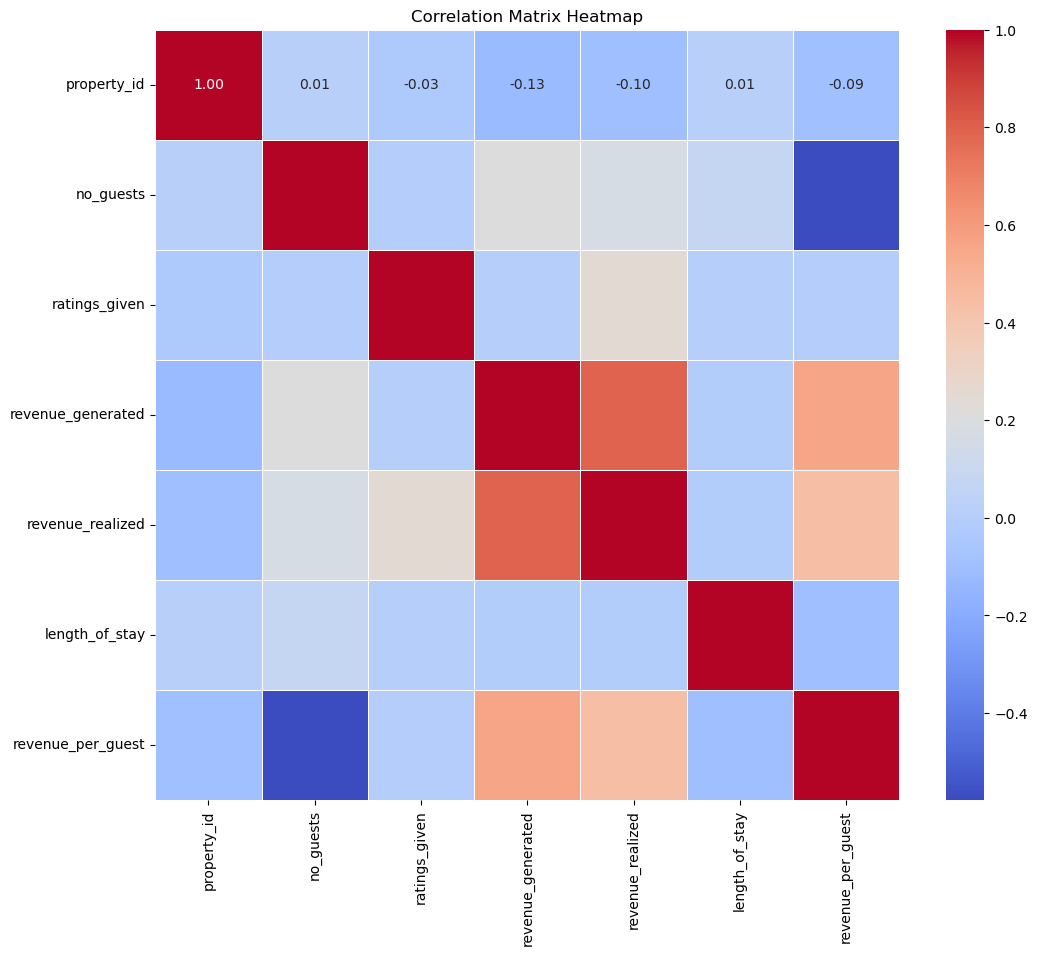

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized,length_of_stay,revenue_per_guest
property_id,1.000000,0.011037,-0.032685,-0.125010,-0.100073,0.010308,-0.093368
no_guests,0.011037,1.000000,-0.000723,0.215558,0.170780,0.077236,-0.577425
ratings_given,-0.032685,-0.000723,1.000000,0.002452,0.251659,0.002171,0.001133
revenue_generated,-0.125010,0.215558,0.002452,1.000000,0.794316,-0.010277,0.559133
revenue_realized,-0.100073,0.170780,0.251659,0.794316,1.000000,-0.005203,0.444904
length_of_stay,0.010308,0.077236,0.002171,-0.010277,-0.005203,1.000000,-0.098827
revenue_per_guest,-0.093368,-0.577425,0.001133,0.559133,0.444904,-0.098827,1.000000


In [34]:
# Correlation matrix and heatmap to visualize relationships between variables.
correlation_matrix = fact_bookings.corr( numeric_only=True,)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

correlation_matrix

In [35]:
fact_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30
1,19562,2022-05-01,RT1,28,30
2,19563,2022-05-01,RT1,23,30
3,17558,2022-05-01,RT1,13,19
4,16558,2022-05-01,RT1,18,19
...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18
9196,16559,2022-07-31,RT4,13,18
9197,17558,2022-07-31,RT4,3,6
9198,19563,2022-07-31,RT4,3,6


In [36]:
fact_agg_bookings["occcupancy"]=((fact_agg_bookings["successful_bookings"]/fact_agg_bookings["capacity"])*100).round(2)

In [38]:
hotels_agg_bookings=pd.merge(fact_agg_bookings,dim_rooms,left_on="room_category",right_on="room_id")

In [40]:
hotels_agg_bookings=pd.merge(hotels_agg_bookings,dim_hotels,on="property_id")

In [42]:
hotels_agg_bookings=pd.merge(hotels_agg_bookings,dim_date,left_on="check_in_date",right_on="date")

In [43]:
hotels_agg_bookings.drop(["room_id","date"],axis=1,inplace=True)


In [44]:
hotels_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occcupancy,room_class,property_name,category,city,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Delhi,May 22,W 19,weekend
1,16559,2022-05-01,RT2,35,41,85.37,Elite,Atliq Exotica,Luxury,Delhi,May 22,W 19,weekend
2,16559,2022-05-01,RT3,27,32,84.38,Premium,Atliq Exotica,Luxury,Delhi,May 22,W 19,weekend
3,16559,2022-05-01,RT4,17,18,94.44,Presidential,Atliq Exotica,Luxury,Delhi,May 22,W 19,weekend
4,19562,2022-05-01,RT1,28,30,93.33,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,17564,2022-07-31,RT4,10,17,58.82,Presidential,Atliq Seasons,Business,Mumbai,Jul 22,W 32,weekend
9196,18560,2022-07-31,RT1,22,30,73.33,Standard,Atliq City,Business,Hyderabad,Jul 22,W 32,weekend
9197,18560,2022-07-31,RT2,34,40,85.00,Elite,Atliq City,Business,Hyderabad,Jul 22,W 32,weekend
9198,18560,2022-07-31,RT3,17,24,70.83,Premium,Atliq City,Business,Hyderabad,Jul 22,W 32,weekend


In [56]:
hotels_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   int64         
 5   occcupancy           9200 non-null   float64       
 6   room_class           9200 non-null   object        
 7   property_name        9200 non-null   object        
 8   category             9200 non-null   object        
 9   city                 9200 non-null   object        
 10  mmm yy               9200 non-null   object        
 11  week no              9200 non-null   object        
 12  day_type             9200 non-null   object        
dtypes: datetime64[ns](1), float64(1),

In [57]:
hotels_agg_bookings.to_csv("hotels_performance.csv",index=False)

## detail Information of each booking 

In [58]:
fact_bookings.groupby(["property_id","check_in_date","room_category"])["booking_status"].count()

property_id  check_in_date  room_category
16558        2022-05-01     RT1              18
                            RT2              21
                            RT3               8
                            RT4               3
             2022-05-02     RT1              12
                                             ..
19563        2022-07-30     RT4               4
             2022-07-31     RT1              18
                            RT2              25
                            RT3              20
                            RT4               3
Name: booking_status, Length: 9200, dtype: int64

In [59]:
bookings_details=pd.merge(fact_bookings,dim_hotels,on="property_id")


In [60]:
bookings_details=pd.merge(bookings_details,dim_rooms,left_on="room_category",right_on="room_id")


In [61]:
bookings_details=pd.merge(bookings_details,dim_date,left_on="check_in_date",right_on="date")


In [62]:
bookings_details.drop(["room_id","date"],axis=1,inplace=True)


In [63]:
bookings_details.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,revenue_realized,length_of_stay,revenue_per_guest,property_name,category,city,room_class,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,...,10010,1,3336.67,Atliq Grands,Luxury,Delhi,Standard,May 22,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,...,3640,1,4550.00,Atliq Grands,Luxury,Delhi,Standard,May 22,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,...,9100,3,4550.00,Atliq Grands,Luxury,Delhi,Standard,May 22,W 19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,...,3640,1,4550.00,Atliq Grands,Luxury,Delhi,Standard,May 22,W 19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,...,10920,1,2730.00,Atliq Grands,Luxury,Delhi,Standard,May 22,W 19,weekend


In [64]:
bookings_details["early_booking"]=(bookings_details["check_in_date"] - bookings_details["booking_date"]).dt.days

In [65]:
bookings_details

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,length_of_stay,revenue_per_guest,property_name,category,city,room_class,mmm yy,week no,day_type,early_booking
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,...,1,3336.67,Atliq Grands,Luxury,Delhi,Standard,May 22,W 19,weekend,4
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,...,1,4550.00,Atliq Grands,Luxury,Delhi,Standard,May 22,W 19,weekend,1
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,...,3,4550.00,Atliq Grands,Luxury,Delhi,Standard,May 22,W 19,weekend,3
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,...,1,4550.00,Atliq Grands,Luxury,Delhi,Standard,May 22,W 19,weekend,3
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,...,1,2730.00,Atliq Grands,Luxury,Delhi,Standard,May 22,W 19,weekend,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,...,3,32300.00,Atliq Seasons,Business,Mumbai,Presidential,Jul 22,W 32,weekend,2
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,...,1,9690.00,Atliq Seasons,Business,Mumbai,Presidential,Jul 22,W 32,weekend,1
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,0.0,Cancelled,...,2,32300.00,Atliq Seasons,Business,Mumbai,Presidential,Jul 22,W 32,weekend,1
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,...,1,16150.00,Atliq Seasons,Business,Mumbai,Presidential,Jul 22,W 32,weekend,2


In [66]:
bookings_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      134590 non-null  float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
 12  length_of_stay     134590 non-null  int64         
 13  revenue_per_guest  134590 non-null  float64 

In [67]:
bookings_details.to_csv("bookings_details.csv",index=False)



### Additional Visualizations in Tableau Dashboards:
For more detailed and interactive visualizations, explore the Tableau dashboards created for this project. Click [here](https://public.tableau.com/app/profile/akash.patil7337/viz/AtliQHospitalityAnalysis_17155244713090/AtliQHospitalityAnalysis) to access the Tableau dashb project.

advantage in the hospitality industry.

### Insights from Data Analysis:

#### Dataset - dim_date:
- The dataset contains information about dates, including month, week number, and day type.
- It consists of 92 entries and 4 columns.
- All columns have non-null values.
- The memory usage for this dataset is minimal, indicating efficient memory utilization.

#### Dataset - dim_hotels:
- This dataset provides details about hotels, including property ID and room class.
- It contains 4 entries and 2 columns.
- All columns have non-null values.
- Memory usage for this dataset is minimal.

#### Dataset - dim_rooms:
- Details about room categories and room IDs are provided in this dataset.
- It consists of 4 entries and 2 columns.
- All columns have non-null values.
- Memory usage is very minimal.

#### Dataset - fact_aggregated_bookings:
- Contains aggregated booking information such as property ID, check-in date, room category, successful bookings, and capacity.
- 9200 entries and 5 columns.
- Non-null values present in all columns.
- Moderate memory usage, indicating reasonable memory footprint.

#### Dataset - fact_bookings:
- Comprehensive booking details including booking ID, property ID, booking dates, room details, revenue, and ratings.
- 134,590 entries and 12 columns.
- Non-null values exist in most columns, except for 'ratings_given' which has missing values.
- Relatively high memory usage due to the large number of entries and columns.

#### General Insights:
- Right-skewed distributions observed in revenue-related columns ('revenue_realized' and 'revenue_generated'), indicating a concentration of lower revenue values.
- Majority of bookings have a length of stay of 1 day, followed by 2-day stays.
- Correlation analysis reveals relationships between numerical variables, with revenue-related columns exhibiting positive correlations.
- Occupancy rates calculated based o influence on booking patterns and revenue.

ic hospitality industry landscape.